## Newton-fraktál rajzolása

In [ ]:
%pylab inline

from colorsys import hsv_to_rgb

Populating the interactive namespace from numpy and matplotlib


In [ ]:
class Expr:
    def __init__(self,lhs,rhs,op):
        self.lhs,self.rhs,self.op = lhs,rhs,op
        
    def __add__(self,rhs):
        if type(rhs) == Expr:
            return Expr(self,rhs,'+')
        else:
            return Expr(self,rhs,'+n')
    
    def __radd__(self,lhs):
        return Expr(self,lhs,'+n')
    
    def __sub__(self,rhs):
        if type(rhs) == Expr:
            return self+rhs*(-1)
        else:
            return self+(-rhs)
        
    def __rsub__(self,lhs):
        return lhs+self*(-1)
    
    def __neg__(self):
        return (-1)*self
    
    def __mul__(self,rhs):
        if type(rhs) == Expr:
            return Expr(self,rhs,'*')
        else:
            return Expr(self,rhs,'*n')
    
    def __rmul__(self,lhs):
        return Expr(self,lhs,'*n')
    
    def __truediv__(self,rhs):
        if type(rhs) == Expr:
            return self*rhs**(-1)
        else:
            return self*(1/rhs)
        
    def __rtruediv__(self,lhs):
        return self**(-1)*lhs
    
    def __pow__(self,rhs):
        if type(rhs) == Expr:
            return Expr(self,rhs,'**')
        else:
            return Expr(self,rhs,'**n')
        
    def __rpow__(self,lhs):
        return Expr(lhs,self,'n**')
    
    def __call__(self,x0):
        if self.op == '+':
            return self.lhs(x0) + self.rhs(x0)
        elif self.op == '+n':
            return self.lhs(x0) + self.rhs
        elif self.op == '*':
            return self.lhs(x0) * self.rhs(x0)
        elif self.op == '*n':
            return self.lhs(x0) * self.rhs
        elif self.op == '**':
            return self.lhs(x0)**self.rhs(x0)
        elif self.op == '**n':
            return self.lhs(x0)**self.rhs
        elif self.op == 'n**':
            return self.lhs**self.rhs(x0)
        elif self.op == 'sin':
            return sin(self.lhs(x0))
        elif self.op == 'cos':
            return cos(self.lhs(x0))
        elif self.op == 'log':
            return log(self.lhs(x0))
        elif self.op == 'exp':
            return exp(self.lhs(x0))
        elif self.op == 'id':
            return x0
        elif self.op == 'const':
            return self.lhs
        else:
            raise NotImplementedError
        
    def diff(self):
        if self.op == '+':
            return self.lhs.diff() + self.rhs.diff()
        elif self.op == '+n':
            return self.lhs.diff()
        elif self.op == '*':
            return self.lhs.diff()*self.rhs + self.lhs*self.rhs.diff()
        elif self.op == '*n':
            return self.lhs.diff()*self.rhs
        elif self.op == '**':
            return self.lhs**self.rhs * (self.rhs.diff()*Log(self.lhs) + self.rhs*self.lhs.diff()/self.lhs)
        elif self.op == '**n':
            return self.rhs*self.lhs**(self.rhs-1)*self.lhs.diff()
        elif self.op == 'n**':
            return self.lhs**self.rhs*log(self.lhs)*self.rhs.diff()
        elif self.op == 'sin':
            return Cos(self.lhs)*self.lhs.diff()
        elif self.op == 'cos':
            return -Sin(self.lhs)*self.lhs.diff()
        elif self.op == 'log':
            return self.lhs.diff()/self.lhs
        elif self.op == 'exp':
            return Exp(self.lhs)*self.lhs.diff()
        elif self.op == 'id':
            return Expr(1,None,'const')
        elif self.op == 'const':
            return Expr(0,None,'const')
        else:
            raise NotImplementedError
    
def Sin(x):
    return Expr(x,None,'sin')
def Cos(x):
    return Expr(x,None,'cos')
def Log(x):
    return Expr(x,None,'log')
def Exp(x):
    return Expr(x,None,'exp')
def Sqrt(x):
    return x**0.5
x = Expr(None,None,'id')

In [ ]:
def NR(f,x0,max_iters=100):
    df = f.diff()
    cnt = np.zeros(len(x0))
    for i in range(max_iters):
        fx0  = f(x0)
        conv = abs(fx0)>1e-6
        x0  -= conv*fx0/df(x0)
        cnt += conv
    return x0,cnt

In [ ]:
seterr(all='ignore')
s = 800
c = np.add.outer(np.linspace(-2,2,s),np.linspace(-2,2,s)*1j).flatten()
res,cnt = NR(x**11-x**7/7-x**3/3-x-1+Sin(x),c)

In [ ]:
rnd   = np.round(res,4)
roots = unique(rnd[~isnan(rnd)])
mcnt  = max(cnt)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


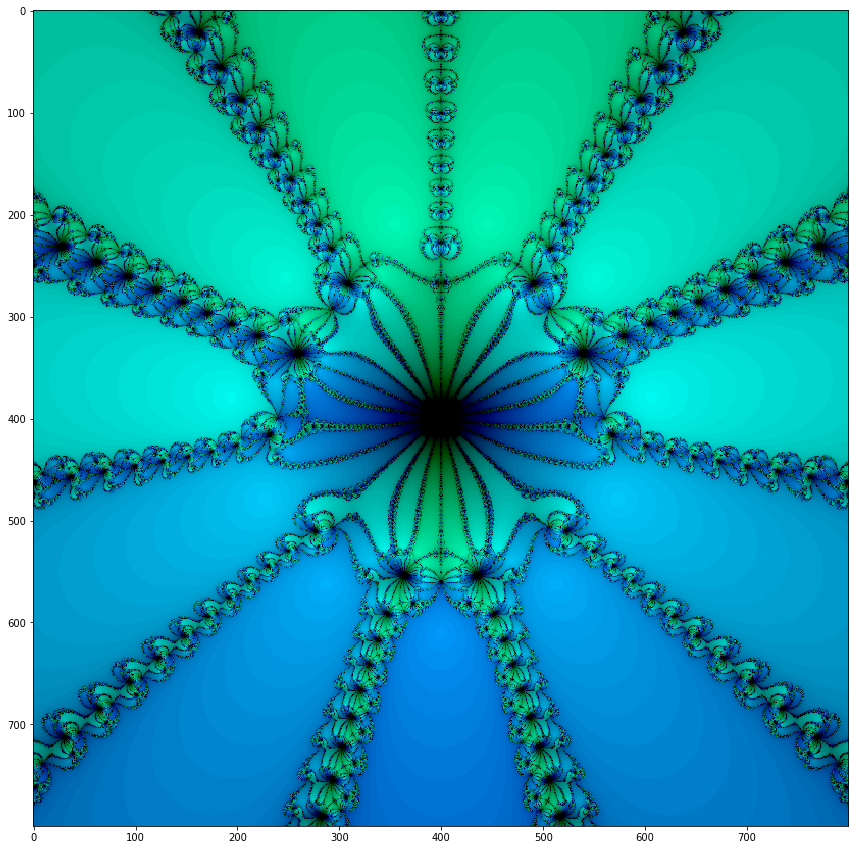

In [ ]:
cols  = {roots[r]:array(list(hsv_to_rgb(r/len(roots),1.0,1.0))) for r in range(len(roots))}
img   = zeros((len(res),3))
for r in range(len(res)):
    if rnd[r] in cols:
        img[r,:] = cols[rnd[r]]-cnt[r]/mcnt*2
img.shape = s,s,3
figure(figsize=(15,15))
imshow(img/np.max(img));